   PassengerId  Survived  Pclass                                  Name  \
0            1         1       3                    Allen, Mr. William   
1            2         0       1              Bonnell, Miss. Elizabeth   
2            3         1       3           Saundercock, Mr. William H.   
3            4         1       1           Andersson, Mr. Anders Johan   
4            5         0       3  Vestrom, Miss. Hulda Amanda Adolfina   

      Sex  Age  SibSp  Parch     Ticket   Fare Cabin Embarked  
0    male   35      0      0     373450   8.05   NaN        S  
1  female   58      0      0     113781  26.55  C103        C  
2    male   20      0      0  A/5. 2151   7.25   NaN        S  
3    male   39      1      5     347082  31.28   NaN        S  
4  female   14      0      0     350406   7.75   NaN        S  

Missing values before cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ti

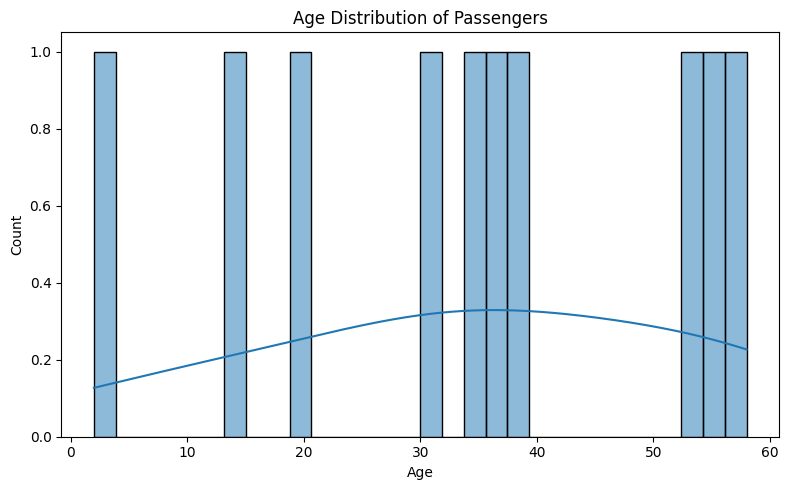

<Figure size 800x500 with 0 Axes>

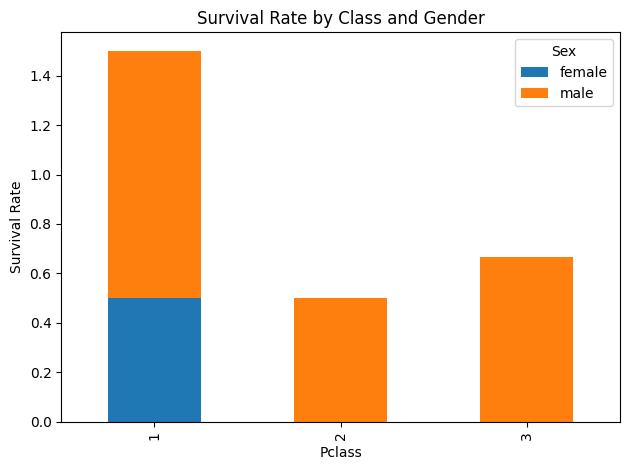

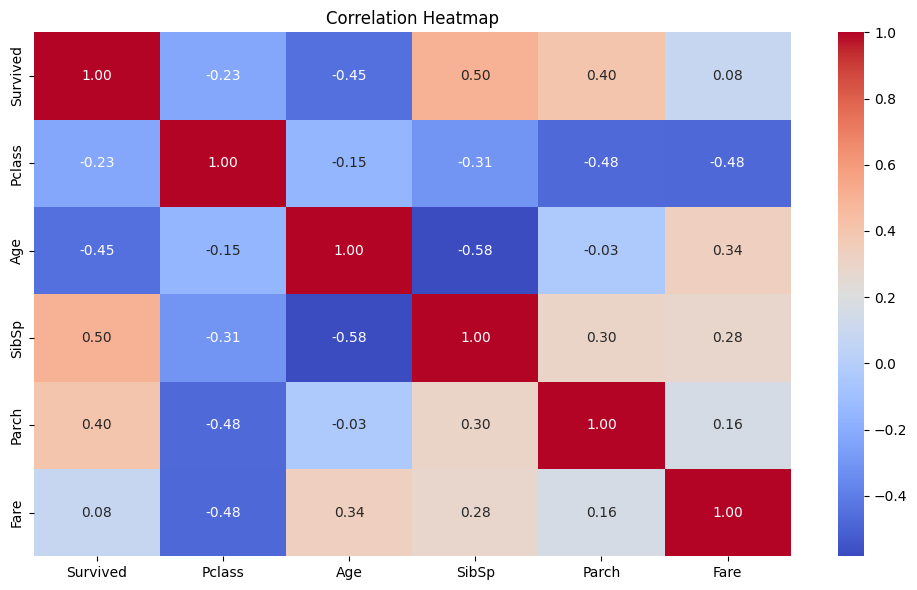

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Md Shah Alak\Downloads\dataset3 - Sheet1.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing values in critical columns
df_cleaned = df.dropna(subset=['Age', 'Embarked'])

# Fill missing Cabin values with 'Unknown'
df_cleaned['Cabin'] = df_cleaned['Cabin'].fillna('Unknown')

# Check again for missing values
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

# Grouping: Survival rate by gender
survival_by_gender = df_cleaned.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_gender)

# Grouping: Survival rate by class
survival_by_class = df_cleaned.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Class:")
print(survival_by_class)

# Grouping: Survival by class and gender
survival_by_gender_class = df_cleaned.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("\nSurvival Rate by Class and Gender:")
print(survival_by_gender_class)

# Visualization 1: Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Visualization 2: Survival by class and gender
plt.figure(figsize=(8, 5))
survival_by_gender_class.plot(kind='bar', stacked=True)
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Rate")
plt.tight_layout()
plt.show()

# Visualization 3: Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df_cleaned[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
